In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from tensorflow.keras.datasets import mnist

In [41]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

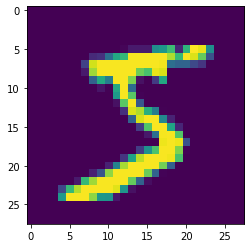

In [42]:
plt.imshow(X_train[0])
#shows full array converted to image

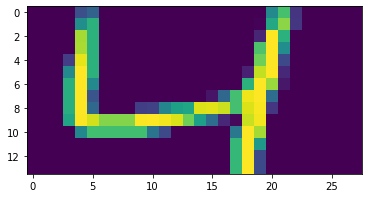

In [43]:
plt.imshow(X_train[2][6:20])
#show only the part of image in the set rage 6 to 20

In [44]:
print(len(X_train[0]))
print(len(X_train[0][0]))
#images are 28 x 28 pixels

28
28


In [45]:
zero_images = X_train[y_train==0]
#as y train and test are arrays with the correct numbers which x train and test images should graphically represent, so by y_train==0 we select only images which contain digit 0
print(len(zero_images))

5923


# Discriminator and Generator code

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [47]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
#Final Output Layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
codings_size = 100
# 100 -> 150 -> 784(28*28=784)

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28, 28]))

In [49]:
GAN = Sequential([generator, discriminator])

In [50]:
discriminator.trainable = False

In [51]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
batch_size=32

In [53]:
my_data = zero_images

In [54]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [55]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [56]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [57]:
epochs = 1

In [58]:
GAN.layers

In [59]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [60]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [63]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        i = i+1
        
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of 185")
                                                         
        #Discriminator
        noise = tf.random.normal(shape=[batch_size,codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        #Train Generator                                                 
        noise = tf.random.normal(shape =[batch_size,codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currently on batch number 100 of 185


In [64]:
noise = tf.random.normal(shape=[10,codings_size])

In [65]:
noise.shape

TensorShape([10, 100])

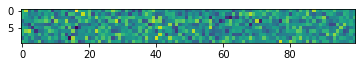

In [66]:
plt.imshow(noise)

In [68]:
images = generator(noise)

In [69]:
images.shape

TensorShape([10, 28, 28])

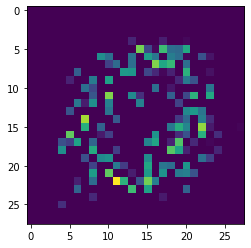

In [75]:
plt.imshow(images[6])


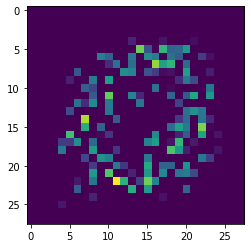

In [76]:
plt.imshow(images[1])